# Cybercrime visual analysis

***


1. **Introduction**
   - Load data 
   - Overview of analysis goals.

2. **Temporal Analysis**
   - Pie chart: Cyber-attacks over time.
   - Bar chart: Cyber-attacks by year.
   - Heatmap: Attacks by month and year.

3. **Geographical Analysis**
   - Pie chart: Top affected countries.
   - Bar chart: Distribution by country.
   - Heatmap: Geographical distribution.

4. **Attack Methods**
   - Pie chart: Common attack vectors.
   - Bar chart: Frequency of attack methods.

5. **Sectoral Targeting**
   - Pie chart: Vulnerable industries.
   - Bar chart: Industries by attack count.
   - Heatmap: Sector trends over time.
   
6. **Predictive Insights**
   - Pie chart: Predicted risk levels.
   - Bar chart: Breakdown of predicted risks.

   ***


## Load data 

***

In [1]:
import pandas as pd

# Load the dataset
data_path = "/repos/PFDA-project/data/processed_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows to confirm the dataset
print(df.head())


        attackdate                 country     spam  ransomware  \
0  11/10/2022 0:00  Arab Republic of Egypt  0.00090          13   
1  11/10/2022 0:00      Argentine Republic  0.00601           6   
2  11/10/2022 0:00                   Aruba  0.00000           0   
3  11/10/2022 0:00   Bailiwick of Guernsey  0.00000           0   
4  11/10/2022 0:00     Bailiwick of Jersey  0.00003           0   

   local_infection  exploit  malicious_mail  network_attack  on_demand_scan  \
0          0.01353  0.00013         0.00287         0.01007         0.01148   
1          0.00575  0.00035         0.00058         0.00095         0.00482   
2          0.01384  0.00000         0.00092         0.00000         0.00830   
3          0.00546  0.00273         0.00000         0.00091         0.00546   
4          0.00774  0.00101         0.00067         0.00000         0.00707   

   web_threat  rank_spam  rank_ransomware  rank_local_infection  rank_exploit  \
0     0.01708       68.0             47.0

#### Extract year

In [2]:
# If 'attackdate' exists, extract 'year'
if 'attackdate' in df.columns:
    df['year'] = pd.to_datetime(df['attackdate'], errors='coerce').dt.year


## 1. Temporal analysis: Cyber-Attacks Over Time

***

#### Bar Chart

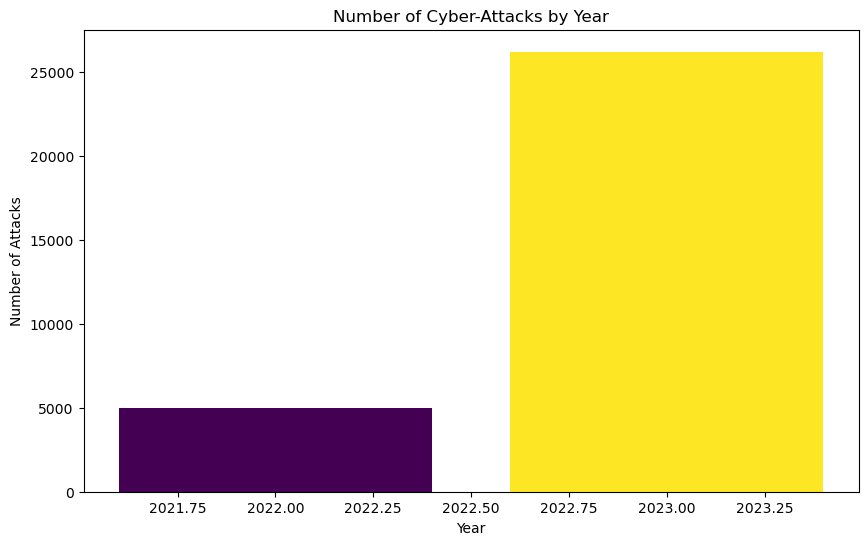

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for advanced visualizations

# Assuming df is already loaded and cleaned
# Temporal analysis: Count attacks per year
if 'year' in df.columns:
    yearly_counts = df['year'].value_counts().sort_index()

    # Bar chart
    # Bar chart for yearly counts
    # Bar chart for yearly counts with Matplotlib coloring
    plt.figure(figsize=(10, 6))
    bars = plt.bar(yearly_counts.index, yearly_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(yearly_counts))))
    plt.title("Number of Cyber-Attacks by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Attacks")
    plt.show()


else:
    print("The 'year' column is missing in the dataset.")


#### Heatmap

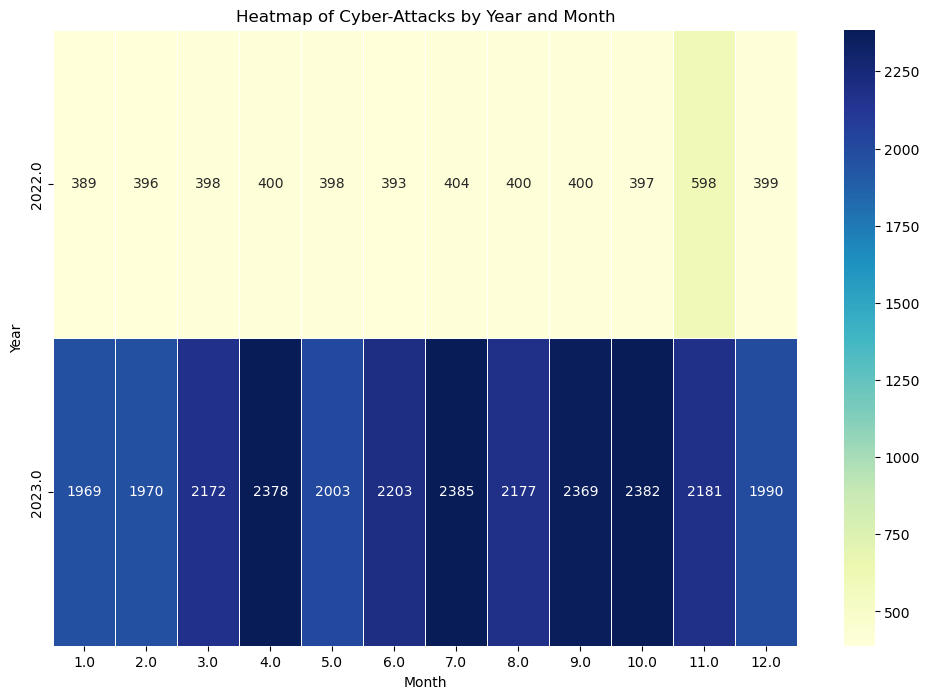

In [5]:
# Ensure 'year' and 'month' columns are present
if 'attackdate' in df.columns:
    df['year'] = pd.to_datetime(df['attackdate'], errors='coerce').dt.year
    df['month'] = pd.to_datetime(df['attackdate'], errors='coerce').dt.month

# Generate heatmap if 'year' and 'month' exist
if 'year' in df.columns and 'month' in df.columns:
    temporal_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

    if not temporal_data.empty:
        # Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(temporal_data, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
        plt.title("Heatmap of Cyber-Attacks by Year and Month")
        plt.xlabel("Month")
        plt.ylabel("Year")
        plt.show()
    else:
        print("No data available for heatmap.")
else:
    print("The required 'year' or 'month' column is missing.")
